In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Load data for 100 random stocks from S&P 500
start_date = '2020-03-20'
end_date = '2022-02-05'
tickers = ['ORCL','TSLA','BMY','NKE','PG','CSCO','AMD','RTX','T',
           'ACN','XOM','AAPL','MSFT','NVDA','GOOGL','AMAT','LRCX',
           'ZM','TDOC','CRWD','MCD','JPM','JNJ','NFLX','TSM','TEAM',
           'V','ROKU']
prices = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  28 of 28 completed


Sharpe Ratio: 1.42


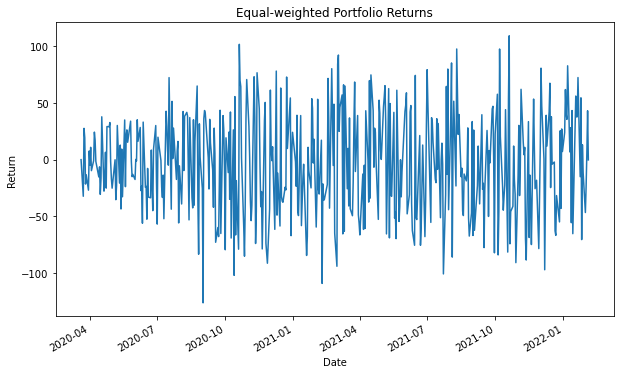

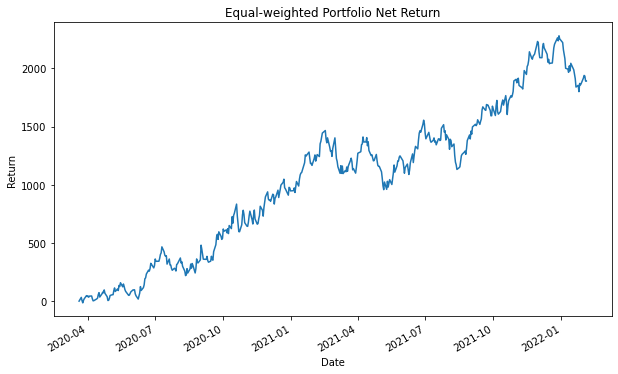

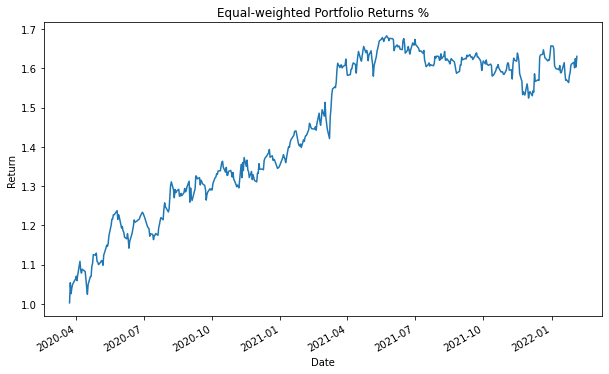

In [5]:
# Step 2: Implement the strategy
returns = np.log(prices / prices.shift(1))[1:]
mean_return = returns.mean(axis=1)
weights = pd.Series(1/len(tickers), index=tickers)
portfolio_values = [1.0]
port_return=[]
for i in range(1, len(prices)):
    port_return.append(1+np.dot(weights, returns.iloc[i-1].values))
    # Compute weights for the next day
    deviations = (returns.iloc[i-1]-mean_return[i-1]).values
    total_deviation = np.abs(deviations).sum()
    
    weights = -deviations / total_deviation
    # Compute portfolio value for the next day
    
    portfolio_value = (weights * prices.iloc[i]).sum()
    portfolio_values.append(portfolio_value)

# Step 3: Plot the results
portfolio_returns = pd.Series(portfolio_values, index=prices.index) / portfolio_values[0] - 1
portfolio_sharpe = (-portfolio_returns.mean() / portfolio_returns.std()) * np.sqrt(252)
portfolio_ret = -portfolio_returns.cumsum()
print("Sharpe Ratio: {:.2f}".format(portfolio_sharpe))
portfolio_returns.plot(figsize=(10,6))
plt.title('Equal-weighted Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()
portfolio_ret.plot(figsize=(10,6))
plt.title('Equal-weighted Portfolio Net Return')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()
pd.Series(np.array(port_return).cumprod(), index=prices.index[1:]).plot(figsize=(10,6))
plt.title('Equal-weighted Portfolio Returns %')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()